In [1]:
import pandas as pd
import numpy as np
import warnings
import scipy
from datetime import timedelta

In [2]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv("wiki/train_1.csv")

In [6]:
train.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
train.columns[-50:]

Index(['2016-11-12', '2016-11-13', '2016-11-14', '2016-11-15', '2016-11-16',
       '2016-11-17', '2016-11-18', '2016-11-19', '2016-11-20', '2016-11-21',
       '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-25', '2016-11-26',
       '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01',
       '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05', '2016-12-06',
       '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-10', '2016-12-11',
       '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
       '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21',
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object')

In [8]:
list(train.columns[-50:])

['2016-11-12',
 '2016-11-13',
 '2016-11-14',
 '2016-11-15',
 '2016-11-16',
 '2016-11-17',
 '2016-11-18',
 '2016-11-19',
 '2016-11-20',
 '2016-11-21',
 '2016-11-22',
 '2016-11-23',
 '2016-11-24',
 '2016-11-25',
 '2016-11-26',
 '2016-11-27',
 '2016-11-28',
 '2016-11-29',
 '2016-11-30',
 '2016-12-01',
 '2016-12-02',
 '2016-12-03',
 '2016-12-04',
 '2016-12-05',
 '2016-12-06',
 '2016-12-07',
 '2016-12-08',
 '2016-12-09',
 '2016-12-10',
 '2016-12-11',
 '2016-12-12',
 '2016-12-13',
 '2016-12-14',
 '2016-12-15',
 '2016-12-16',
 '2016-12-17',
 '2016-12-18',
 '2016-12-19',
 '2016-12-20',
 '2016-12-21',
 '2016-12-22',
 '2016-12-23',
 '2016-12-24',
 '2016-12-25',
 '2016-12-26',
 '2016-12-27',
 '2016-12-28',
 '2016-12-29',
 '2016-12-30',
 '2016-12-31']

In [10]:
train[list(train.columns[-50:])]

,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,22.0,21.0,18.0,30.0,20.0,12.0,17.0,12.0,122.0,31.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,11.0,7.0,8.0,14.0,9.0,8.0,3.0,7.0,7.0,8.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,81.0,59.0,19.0,55.0,48.0,44.0,21.0,58.0,141.0,115.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,25.0,63.0,32.0,44.0,25.0,27.0,23.0,34.0,90.0,82.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,32.0,20.0,20.0,37.0,19.0,27.0,22.0,11.0,17.0,14.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [11]:
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')

In [12]:
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')

In [13]:
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)

In [14]:
# Median by page
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

In [15]:
# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

In [16]:
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [17]:
train_flattened.describe()

,Visits,weekend,mean,median
count,7.053930e+06,7.253150e+06,7.191700e+06,7.191700e+06
mean,1.471910e+03,3.000000e-01,1.450476e+03,1.214468e+03
std,8.208759e+04,4.582576e-01,8.057482e+04,8.017754e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,0.000000e+00,2.428000e+01,1.900000e+01
50%,1.580000e+02,0.000000e+00,1.914300e+02,1.440000e+02
75%,6.860000e+02,1.000000e+00,8.073200e+02,6.295000e+02
max,2.834288e+07,1.000000e+00,2.320080e+07,2.291056e+07


In [18]:
train_flattened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253150 entries, !vote_en.wikipedia.org_all-access_all-agents to ［Alexandros］_ja.wikipedia.org_mobile-web_all-agents
Data columns (total 5 columns):
date       datetime64[ns]
Visits     float64
weekend    float64
mean       float64
median     float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 332.0+ MB


In [19]:
train_flattened.reset_index(drop=False,inplace=True)

In [21]:
train_flattened['date']

0         2016-11-12
1         2016-11-13
2         2016-11-14
3         2016-11-15
4         2016-11-16
5         2016-11-17
6         2016-11-18
7         2016-11-19
8         2016-11-20
9         2016-11-21
10        2016-11-22
11        2016-11-23
12        2016-11-24
13        2016-11-25
14        2016-11-26
15        2016-11-27
16        2016-11-28
17        2016-11-29
18        2016-11-30
19        2016-12-01
20        2016-12-02
21        2016-12-03
22        2016-12-04
23        2016-12-05
24        2016-12-06
25        2016-12-07
26        2016-12-08
27        2016-12-09
28        2016-12-10
29        2016-12-11
             ...    
7253120   2016-12-02
7253121   2016-12-03
7253122   2016-12-04
7253123   2016-12-05
7253124   2016-12-06
7253125   2016-12-07
7253126   2016-12-08
7253127   2016-12-09
7253128   2016-12-10
7253129   2016-12-11
7253130   2016-12-12
7253131   2016-12-13
7253132   2016-12-14
7253133   2016-12-15
7253134   2016-12-16
7253135   2016-12-17
7253136   201

In [22]:
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())

In [23]:
train_flattened['weekday']

0          5
1          6
2          0
3          1
4          2
5          3
6          4
7          5
8          6
9          0
10         1
11         2
12         3
13         4
14         5
15         6
16         0
17         1
18         2
19         3
20         4
21         5
22         6
23         0
24         1
25         2
26         3
27         4
28         5
29         6
          ..
7253120    4
7253121    5
7253122    6
7253123    0
7253124    1
7253125    2
7253126    3
7253127    4
7253128    5
7253129    6
7253130    0
7253131    1
7253132    2
7253133    3
7253134    4
7253135    5
7253136    6
7253137    0
7253138    1
7253139    2
7253140    3
7253141    4
7253142    5
7253143    6
7253144    0
7253145    1
7253146    2
7253147    3
7253148    4
7253149    5
Name: weekday, dtype: int64

In [24]:
# Feature engineering with the date
train_flattened['Date_str'] = train_flattened['date'].apply(lambda x: str(x))
train_flattened[ ['year','month','day']] = pd.DataFrame(train_flattened['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])

In [25]:
train_flattened['day']

0          12 00:00:00
1          13 00:00:00
2          14 00:00:00
3          15 00:00:00
4          16 00:00:00
5          17 00:00:00
6          18 00:00:00
7          19 00:00:00
8          20 00:00:00
9          21 00:00:00
10         22 00:00:00
11         23 00:00:00
12         24 00:00:00
13         25 00:00:00
14         26 00:00:00
15         27 00:00:00
16         28 00:00:00
17         29 00:00:00
18         30 00:00:00
19         01 00:00:00
20         02 00:00:00
21         03 00:00:00
22         04 00:00:00
23         05 00:00:00
24         06 00:00:00
25         07 00:00:00
26         08 00:00:00
27         09 00:00:00
28         10 00:00:00
29         11 00:00:00
              ...     
7253120    02 00:00:00
7253121    03 00:00:00
7253122    04 00:00:00
7253123    05 00:00:00
7253124    06 00:00:00
7253125    07 00:00:00
7253126    08 00:00:00
7253127    09 00:00:00
7253128    10 00:00:00
7253129    11 00:00:00
7253130    12 00:00:00
7253131    13 00:00:00
7253132    

In [26]:
train_flattened['day'].str.split(' ',2)

0          [12, 00:00:00]
1          [13, 00:00:00]
2          [14, 00:00:00]
3          [15, 00:00:00]
4          [16, 00:00:00]
5          [17, 00:00:00]
6          [18, 00:00:00]
7          [19, 00:00:00]
8          [20, 00:00:00]
9          [21, 00:00:00]
10         [22, 00:00:00]
11         [23, 00:00:00]
12         [24, 00:00:00]
13         [25, 00:00:00]
14         [26, 00:00:00]
15         [27, 00:00:00]
16         [28, 00:00:00]
17         [29, 00:00:00]
18         [30, 00:00:00]
19         [01, 00:00:00]
20         [02, 00:00:00]
21         [03, 00:00:00]
22         [04, 00:00:00]
23         [05, 00:00:00]
24         [06, 00:00:00]
25         [07, 00:00:00]
26         [08, 00:00:00]
27         [09, 00:00:00]
28         [10, 00:00:00]
29         [11, 00:00:00]
                ...      
7253120    [02, 00:00:00]
7253121    [03, 00:00:00]
7253122    [04, 00:00:00]
7253123    [05, 00:00:00]
7253124    [06, 00:00:00]
7253125    [07, 00:00:00]
7253126    [08, 00:00:00]
7253127    [

In [27]:
date_staging = pd.DataFrame(train_flattened['day'].str.split(' ',2).tolist(), columns = ['day','other'])

In [28]:
train_flattened['day'] = date_staging['day']
train_flattened.drop('Date_str',axis = 1, inplace =True)

In [29]:
train_flattened.head(3)

,Page,date,Visits,weekend,mean,median,weekday,year,month,day
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0,5,2016,11,12
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0,6,2016,11,13
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0,0,2016,11,14


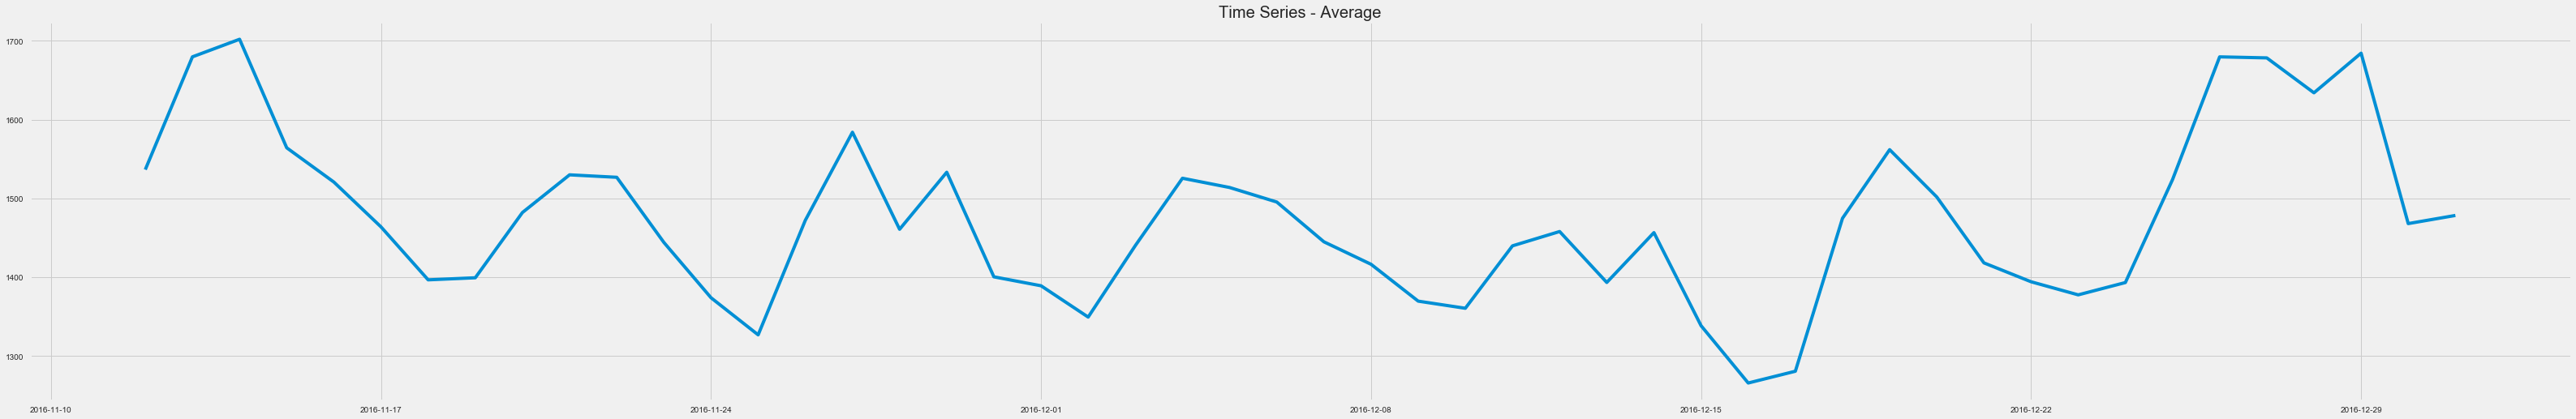

In [30]:
plt.figure(figsize=(50, 8))
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

In [31]:
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11 - November',inplace=True)
train_flattened['month'].replace('12','12 - December',inplace=True)

train_flattened['weekday_num'] = train_flattened['weekday']
train_flattened['weekday'].replace(0,'01 - Monday',inplace=True)
train_flattened['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_flattened['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_flattened['weekday'].replace(3,'04 - Thursday',inplace=True)
train_flattened['weekday'].replace(4,'05 - Friday',inplace=True)
train_flattened['weekday'].replace(5,'06 - Saturday',inplace=True)
train_flattened['weekday'].replace(6,'07 - Sunday',inplace=True)

In [32]:
train_flattened.head(4)

,Page,date,Visits,weekend,mean,median,weekday,year,month,day,month_num,weekday_num
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0,06 - Saturday,2016,11 - November,12,11,5
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0,07 - Sunday,2016,11 - November,13,11,6
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0,01 - Monday,2016,11 - November,14,11,0
3,!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,0.0,2.836735,2.0,02 - Tuesday,2016,11 - November,15,11,1


In [33]:
train_group = train_flattened.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)

In [35]:
train_group

month,11 - November,12 - December
weekday,,
01 - Monday,1564.058295,1553.219910
02 - Tuesday,1541.318249,1517.166439
03 - Wednesday,1454.986458,1488.305696
04 - Thursday,1418.773382,1444.474767
05 - Friday,1361.625633,1365.955630
06 - Saturday,1469.242102,1390.486246
07 - Sunday,1581.814364,1490.858833


In [37]:
train_day = train_flattened.groupby(["month", "day"])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace=True)
train_day.dropna(inplace=True)

In [38]:
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error